## Display Internal Circuits of ControlFlowOps in MPL Circuit Drawer

### Current State

    - All 3 circuit drawers draw composite gates as a single box
    
    - Internal circuit can be decomposed before drawing but delineation is lost

### Issues to Overcome

    - Drawing circuits internal to gates means dealing with nested circuits
    
    - Nesting circuits best handled with recursion
        - Since text/latex drawers depend on left to right flow, recursion is challenging
        - Since mpl uses coordinate system, better able to use recursion
        
    - Boxes surrounding circuits must be able to wrap onto multiple rows

### Done in 3 PRs

    - #10096 - Prequel involves changes to MPL drawer data structures
    
    - #10170 - Implements IfElseOp and WhileLoopOp
    
    - #10207 - Implements ForLoopOp and SwitchCaseOp
    
    - Note: #10207 built on other 2, so could review and merge only that one

### Basic If

In [1]:
from numpy import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

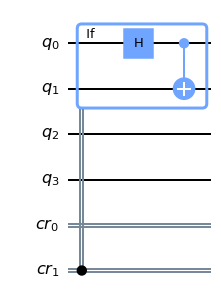

In [2]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(2, "cr")
qc = QuantumCircuit(qr, cr)

with qc.if_test((cr[1], 1)):
    qc.h(0)
    qc.cx(0, 1)
qc.draw()

### Add an Else

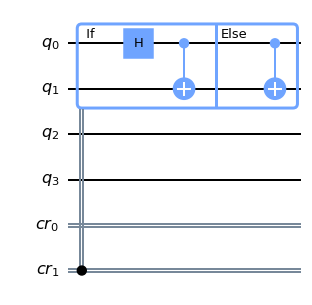

In [3]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(2, "cr")
qc = QuantumCircuit(qr, cr)

with qc.if_test((cr[1], 1)) as _else:
    qc.h(0)
    qc.cx(0, 1)
with _else:
    qc.cx(0, 1)
qc.draw()

### Add Nested If

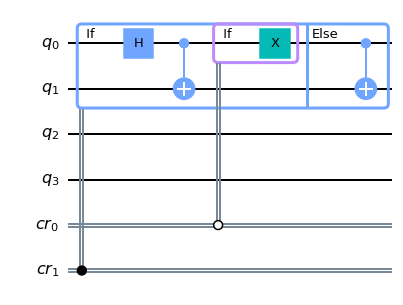

In [4]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(2, "cr")
qc = QuantumCircuit(qr, cr)

with qc.if_test((cr[1], 1)) as _else:
    qc.h(0)
    qc.cx(0, 1)
    with qc.if_test((cr[0], 0)):
        qc.x(0)
with _else:
    qc.cx(0, 1)
qc.draw()

### Create complex nested circuit

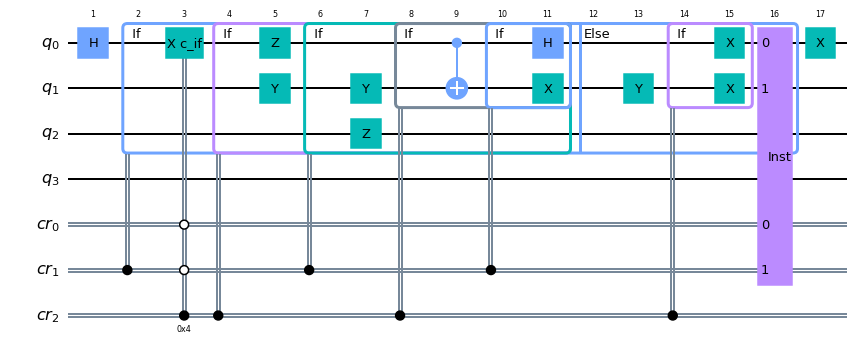

In [11]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(3, "cr")
qc = QuantumCircuit(qr, cr)
qc.h(0)

with qc.if_test((cr[1], 1)) as _else:
    qc.x(0, label="X c_if").c_if(cr, 4)
    with qc.if_test((cr[2], 1)):
        qc.z(0)
        qc.y(1)
        with qc.if_test((cr[1], 1)):
            qc.y(1)
            qc.z(2)
            with qc.if_test((cr[2], 1)):
                qc.cx(0, 1)
                with qc.if_test((cr[1], 1)):
                    qc.h(0)
                    qc.x(1)
with _else:
    qc.y(1)
    with qc.if_test((cr[2], 1)):
        qc.x(0)
        qc.x(1)
    qr1 = QuantumRegister(2, "qr1")
    cr1 = ClassicalRegister(2, "cr1")
    cr2 = ClassicalRegister(2, "cr2")
    circuit = QuantumCircuit(qr1, cr1, cr2)
    inst = QuantumCircuit(2, 2, name="Inst").to_instruction()
    qc.append(inst, [qr[0], qr[1]], [cr[0], cr[1]])
qc.x(0)
qc.draw(fold=30, style={"name": "default", "showindex": True})#,wire_order=(2, 0, 3, 1, 4, 5, 6))

### Folding (Wrapping) Circuits

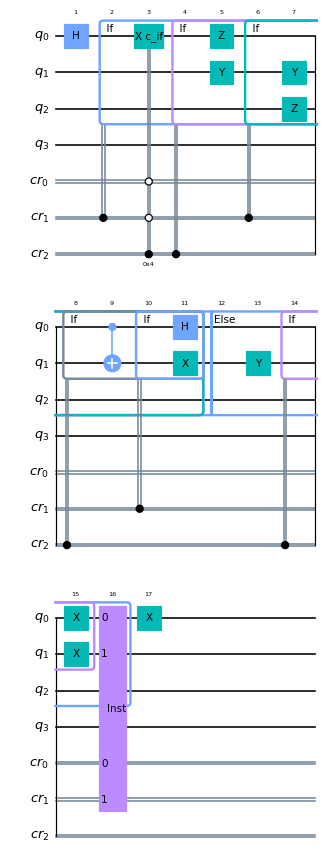

In [6]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(3, "cr")
qc = QuantumCircuit(qr, cr)
qc.h(0)

with qc.if_test((cr[1], 1)) as _else:
    qc.x(0, label="X c_if").c_if(cr, 4)
    with qc.if_test((cr[2], 1)):
        qc.z(0)
        qc.y(1)
        with qc.if_test((cr[1], 1)):
            qc.y(1)
            qc.z(2)
            with qc.if_test((cr[2], 1)):
                qc.cx(0, 1)
                with qc.if_test((cr[1], 1)):
                    qc.h(0)
                    qc.x(1)
with _else:
    qc.y(1)
    with qc.if_test((cr[2], 1)):
        qc.x(0)
        qc.x(1)
    qr1 = QuantumRegister(2, "qr1")
    cr1 = ClassicalRegister(2, "cr1")
    cr2 = ClassicalRegister(2, "cr2")
    circuit = QuantumCircuit(qr1, cr1, cr2)
    inst = QuantumCircuit(2, 2, name="Inst").to_instruction()
    qc.append(inst, [qr[0], qr[1]], [cr[0], cr[1]])
qc.x(0)
qc.draw(fold=7, style={"name": "default", "showindex": True}, scale=0.8)

### Box Colors for Other Styles

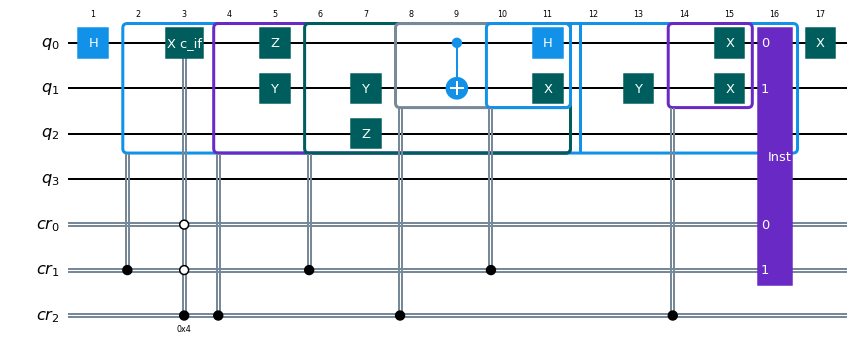

In [12]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(3, "cr")
qc = QuantumCircuit(qr, cr)
qc.h(0)

with qc.if_test((cr[1], 1)) as _else:
    qc.x(0, label="X c_if").c_if(cr, 4)
    with qc.if_test((cr[2], 1)):
        qc.z(0)
        qc.y(1)
        with qc.if_test((cr[1], 1)):
            qc.y(1)
            qc.z(2)
            with qc.if_test((cr[2], 1)):
                qc.cx(0, 1)
                with qc.if_test((cr[1], 1)):
                    qc.h(0)
                    qc.x(1)
with _else:
    qc.y(1)
    with qc.if_test((cr[2], 1)):
        qc.x(0)
        qc.x(1)
    qr1 = QuantumRegister(2, "qr1")
    cr1 = ClassicalRegister(2, "cr1")
    cr2 = ClassicalRegister(2, "cr2")
    circuit = QuantumCircuit(qr1, cr1, cr2)
    inst = QuantumCircuit(2, 2, name="Inst").to_instruction()
    qc.append(inst, [qr[0], qr[1]], [cr[0], cr[1]])
qc.x(0)
qc.draw(fold=30, style={"name": "textbook", "showindex": True})

### While Loop

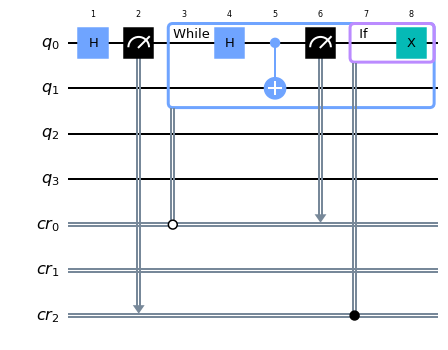

In [8]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(3, "cr")
qc = QuantumCircuit(qr, cr)
qc.h(0)
qc.measure(0, 2)
with qc.while_loop((cr[0], 0)):
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)
    with qc.if_test((cr[2], 1)):
        qc.x(0)
qc.draw(style={"showindex": True})

### For Loop

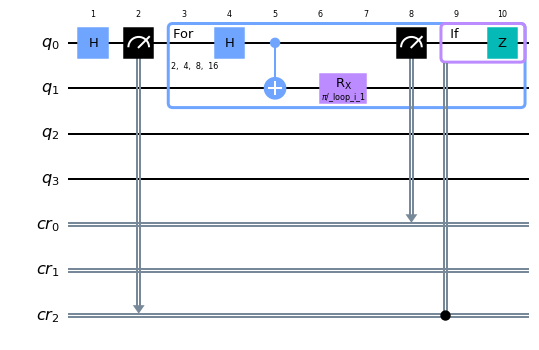

In [13]:
qr = QuantumRegister(4, "q")
cr = ClassicalRegister(3, "cr")
qc = QuantumCircuit(qr, cr)
qc.h(0)
qc.measure(0, 2)
with qc.for_loop((2, 4, 8, 16)) as i:
    qc.h(0)
    qc.cx(0, 1)
    qc.rx(pi/i, 1)
    qc.measure(0, 0)
    with qc.if_test((cr[2], 1)):
        qc.z(0)
qc.draw(style={"showindex": True})

### Switch / Case

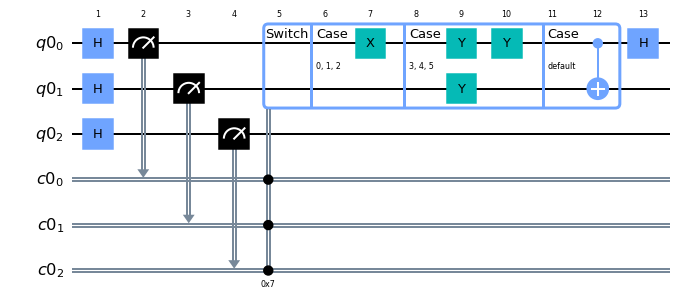

In [10]:
from qiskit.circuit import QuantumCircuit, ClassicalRegister, QuantumRegister
qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
qc = QuantumCircuit(qreg, creg)
qc.h([0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])

with qc.switch(creg) as case:
    with case(0, 1, 2):
        qc.x(0)
    with case(3, 4, 5):
        qc.y(1)
        qc.y(0)
        qc.y(0)
    with case(case.DEFAULT):
        qc.cx(0, 1)
qc.h(0)
qc.draw(style={"showindex": True})


### Futures

    - Additional testing advised - mpl drawer does not currently have auto image testing
    
    - Add circuit in a box for other composite gates?
    
    - Add user options for which internal circuits to expand?
    
    - Add displaying circuits for control flow to text and latex circuit drawers